In [1]:
# Import python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
#import iris dataset from sklearn
iris = datasets.load_iris()

In [3]:
#print description about IRIS dataset
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [4]:
#features in the iris dataset
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
#target in the iris dataset
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [6]:
#update X,y from iris dataset
X = iris.data
y = iris.target

In [7]:
#create dataframe using X,y
df = pd.DataFrame(X,columns=iris.feature_names)

In [8]:
#check header of the created dataframe
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
#append target into dataframe
df['target'] = iris.target

In [10]:
#observe header of the dataframe after appending target column
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
#ways of etracting values from the dataframe (just for the example, not required for this excercise)
x_temp = df.loc[:, iris.feature_names].values
y_temp = df['target']

## Visualize data after transformation into lower dimenstion using PCA
#### 1)  Apply PCA to transform iris dataset into 2D and visualize using Matplotlib
#### 2)  Apply PCA to transform iris dataset into 3D and visualize using mpl_toolkits

### PCA for transformation into 2D data and visualization

In [12]:
#Apply PCA to transform iris dataset into 2D for visuallization
pca2 = PCA(n_components=2)
principalComponents2 = pca2.fit_transform(X)
principalDf2 = pd.DataFrame(data = principalComponents2, columns = ['principal component 1', 'principal component 2'])
finalDf2 = pd.concat([principalDf2, df[['target']]], axis = 1)
finalDf2.head(5)

,principal component 1,principal component 2,target
0,-2.684207,0.326607,0
1,-2.715391,-0.169557,0
2,-2.889820,-0.137346,0
3,-2.746437,-0.311124,0
4,-2.728593,0.333925,0


In [13]:
#check the statistical values of the model transformed from 4D to 2D
print(f"components_ in the data transformed to 2D : \n{pca2.components_}\n")
print(f"explained_variance_ in the data transformed to 2D : \n{pca2.explained_variance_}\n")
print(f"score in the data transformed to 2D : \n{pca2.score(X)}")

components_ in the data transformed to 2D : 
[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]]

explained_variance_ in the data transformed to 2D : 
[ 4.22484077  0.24224357]

score in the data transformed to 2D : 
-2.7001028784349113


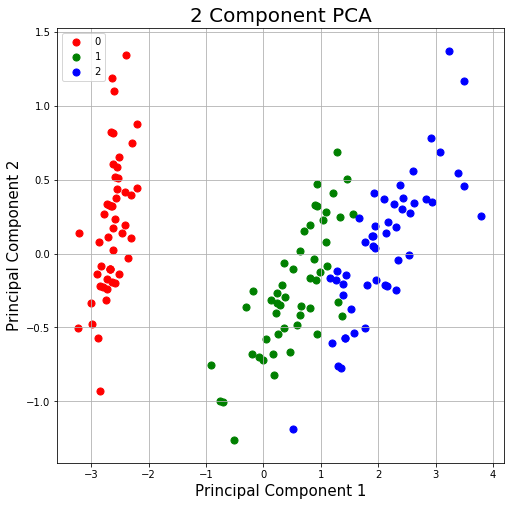

In [14]:
#Visualize the data into 2D
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


#targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
targets = [0,1,2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf2['target'] == target
    ax.scatter(finalDf2.loc[indicesToKeep, 'principal component 1']
               , finalDf2.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### PCA for transformation into 3D data and visualization

In [15]:
#Apply PCA to transform iris dataset into 3D for visuallization
pca3 = PCA(n_components=3)
principalComponents3 = pca3.fit_transform(X)
principalDf3 = pd.DataFrame(data = principalComponents3, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
finalDf3 = pd.concat([principalDf3,df[['target']]], axis=1)
finalDf3.head()

,principal component 1,principal component 2,principal component 3,target
0,-2.684207,0.326607,-0.021512,0
1,-2.715391,-0.169557,-0.203521,0
2,-2.889820,-0.137346,0.024709,0
3,-2.746437,-0.311124,0.037672,0
4,-2.728593,0.333925,0.096230,0


In [16]:
#check the statistical values of the model transformed from 4D to 3D
print(f"components_ in the data transformed to 3D : \n{pca3.components_}\n")
print(f"explained_variance_ in the data transformed to 3D : \n{pca3.explained_variance_}\n")
print(f"score in the data transformed to 3D : \n{pca3.score(X)}")

components_ in the data transformed to 3D : 
[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]
 [-0.58099728  0.59641809  0.07252408  0.54906091]]

explained_variance_ in the data transformed to 3D : 
[ 4.22484077  0.24224357  0.07852391]

score in the data transformed to 3D : 
-2.530331412573759


[Text(0,0,'principal component 3')]

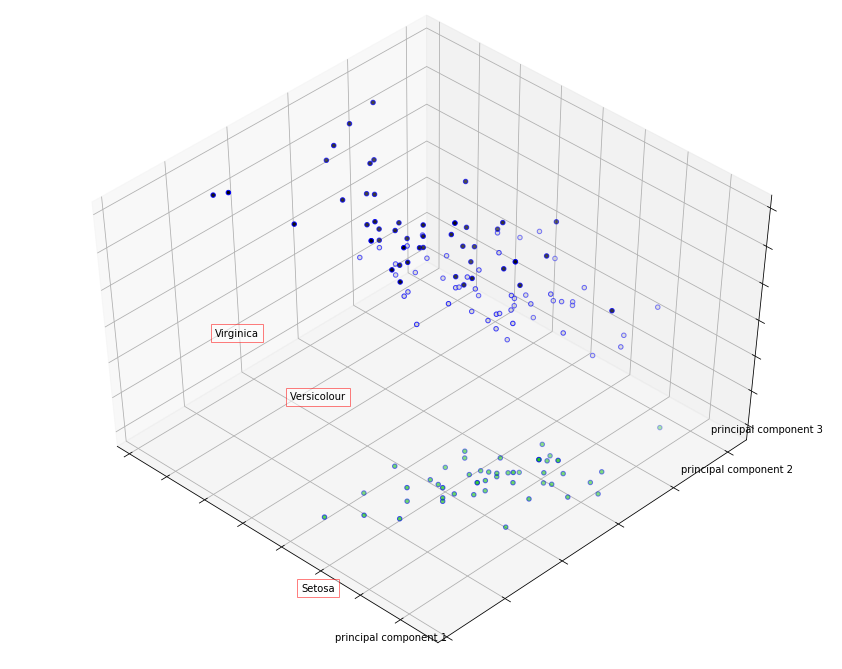

In [17]:
np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]

fig = plt.figure(1, figsize=(12, 9))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='r', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y1 = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y1, cmap=plt.cm.spectral,
           edgecolor='b')

ax.w_xaxis.set_ticklabels(['principal component 1'])
ax.w_yaxis.set_ticklabels(['principal component 2'])
ax.w_zaxis.set_ticklabels(['principal component 3'])